<a href="https://colab.research.google.com/github/arjuna2112/TMDL2025/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import io
from google.colab import files
import pandas as pd

# Load the csv in a DataFrame
df = pd.read_csv('studentperformancelargedataset.csv')

# Look at the first few rows of the DataFrame
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [86]:
# verifying whether the data contains outliers or other impossible values
summary=df.describe()

# splitting the table in three to enhance readability
split = len(summary.columns) // 3
part1 = summary.iloc[:, :split]
part2 = summary.iloc[:, split:2*split]
part3 = summary.iloc[:, 2*split:]

display(part1)
display(part2)
display(part3)

,Age,Gender,Study_Hours_per_Week,Online_Courses_Completed,Participation_in_Discussions
count,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000
mean,23.479675,0.505107,27.116635,9.985303,0.600479
std,3.461611,0.500000,13.004616,6.138630,0.489825
min,18.000000,0.000000,5.000000,0.000000,0.000000
25%,20.000000,0.000000,16.000000,5.000000,0.000000
50%,23.000000,1.000000,27.000000,10.000000,1.000000
75%,27.000000,1.000000,38.000000,15.000000,1.000000
max,29.000000,1.000000,49.000000,20.000000,1.000000


,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Time_Spent_on_Social_Media (hours/week)
count,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000
mean,74.918699,70.178549,75.076923,0.701063,14.943819
std,14.674865,17.659334,14.740697,0.457816,9.032314
min,50.000000,40.000000,50.000000,0.000000,0.000000
25%,62.000000,55.000000,62.000000,0.000000,7.000000
50%,75.000000,70.000000,75.000000,1.000000,15.000000
75%,88.000000,85.000000,88.000000,1.000000,23.000000
max,100.000000,100.000000,100.000000,1.000000,30.000000


,Sleep_Hours_per_Night,Visual_Learning_Style,Kinesthetic_Learning_Style,Auditory_Learning_Style,Reading_Writing_Learning_Style
count,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000
mean,6.970294,0.252866,0.251303,0.244736,0.251094
std,1.996623,0.434678,0.433785,0.429953,0.433665
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,1.000000,1.000000,0.000000,1.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
# checking which variables and their types are available to potentially use in the model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [79]:
# checking which variables contain missing values
print(df.isna().sum())

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64


In [80]:
# checking the possible values of the categorical variables
unique_values1 = df["Gender"].explode().value_counts()
unique_values2 = df["Participation_in_Discussions"].explode().value_counts()
unique_values3 = df["Use_of_Educational_Tech"].explode().value_counts()
unique_values4 = df["Self_Reported_Stress_Level"].explode().value_counts()
unique_values5 = df["Preferred_Learning_Style"].explode().value_counts()

print(unique_values1)
print(unique_values2)
print(unique_values3)
print(unique_values4)
print(unique_values5)

Gender
Female    4846
Male      4748
Other      406
Name: count, dtype: int64
Participation_in_Discussions
Yes    5996
No     4004
Name: count, dtype: int64
Use_of_Educational_Tech
Yes    7022
No     2978
Name: count, dtype: int64
Self_Reported_Stress_Level
Medium    5015
Low       2966
High      2019
Name: count, dtype: int64
Preferred_Learning_Style
Visual             2523
Kinesthetic        2513
Reading/Writing    2498
Auditory           2466
Name: count, dtype: int64


In [81]:
# excluding people with gender "other", since the meaning of that could differ per person and is therefore uncertain
df=df[df["Gender"]!="Other"]
# transforming the categorical variables into dummies to be able to explore the correlations between them and other variables and to later use them in the model
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Gender"] = df["Gender"].fillna(-1).astype(int)
df["Participation_in_Discussions"] = df["Participation_in_Discussions"].map({'Yes': 1, 'No': 0})
df["Participation_in_Discussions"] = df["Participation_in_Discussions"].fillna(-1).astype(int)
df["Use_of_Educational_Tech"] = df["Use_of_Educational_Tech"].map({'Yes': 1, 'No': 0})
df["Use_of_Educational_Tech"] = df["Use_of_Educational_Tech"].fillna(-1).astype(int)
df["Visual_Learning_Style"] = df["Preferred_Learning_Style"].map({'Kinesthetic': 0, 'Reading/Writing': 0, 'Auditory': 0, 'Visual': 1})
df["Kinesthetic_Learning_Style"] = df["Preferred_Learning_Style"].map({'Kinesthetic': 1, 'Reading/Writing': 0, 'Auditory': 0, 'Visual': 0})
df["Auditory_Learning_Style"] = df["Preferred_Learning_Style"].map({'Kinesthetic': 0, 'Reading/Writing': 0, 'Auditory': 1, 'Visual': 0})
df["Reading_Writing_Learning_Style"] = df["Preferred_Learning_Style"].map({'Kinesthetic': 0, 'Reading/Writing': 1, 'Auditory': 0, 'Visual': 0})

<ipython-input-81-978311111743>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
<ipython-input-81-978311111743>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].fillna(-1).astype(int)
<ipython-input-81-978311111743>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [8]:
# displaying the correlations between all variables to get more insight into the data
df.corr(numeric_only=True)

,Age,Gender,Study_Hours_per_Week,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Visual_Learning_Style,Kinesthetic_Learning_Style,Auditory_Learning_Style,Reading_Writing_Learning_Style
Age,1.000000,0.001776,-0.001713,-0.004358,0.005016,-0.008081,0.000804,-0.015085,-0.010938,0.012824,0.011971,-0.015913,0.002812,0.002572,0.010587
Gender,0.001776,1.000000,0.009167,-0.005834,0.000884,0.006563,0.001036,-0.016488,-0.012456,0.013624,0.003128,-0.004024,0.014508,-0.005815,-0.004713
Study_Hours_per_Week,-0.001713,0.009167,1.000000,0.027937,0.012340,0.003260,0.000071,0.007007,0.004824,0.010125,0.009608,-0.017813,0.010954,-0.006877,0.013716
Online_Courses_Completed,-0.004358,-0.005834,0.027937,1.000000,-0.014780,0.001074,0.000012,0.005251,0.005373,0.000720,-0.007537,-0.015875,-0.009652,0.012896,0.012781
Participation_in_Discussions,0.005016,0.000884,0.012340,-0.014780,1.000000,-0.000734,-0.000803,-0.009617,-0.015259,-0.003283,0.005983,-0.002332,0.019253,0.010431,-0.027263
Assignment_Completion_Rate (%),-0.008081,0.006563,0.003260,0.001074,-0.000734,1.000000,0.009440,-0.000451,-0.006969,0.010045,0.008915,0.011950,0.007877,-0.016259,-0.003737
Exam_Score (%),0.000804,0.001036,0.000071,0.000012,-0.000803,0.009440,1.000000,0.002141,-0.009218,0.000782,-0.015894,-0.000450,0.005736,0.010774,-0.015968
Attendance_Rate (%),-0.015085,-0.016488,0.007007,0.005251,-0.009617,-0.000451,0.002141,1.000000,0.008783,-0.014582,-0.005650,-0.013318,-0.001328,0.007983,0.006762
Use_of_Educational_Tech,-0.010938,-0.012456,0.004824,0.005373,-0.015259,-0.006969,-0.009218,0.008783,1.000000,0.009324,0.002943,-0.006694,-0.002763,-0.002699,0.012149
Time_Spent_on_Social_Media (hours/week),0.012824,0.013624,0.010125,0.000720,-0.003283,0.010045,0.000782,-0.014582,0.009324,1.000000,0.001214,-0.018684,0.022760,0.004856,-0.008853


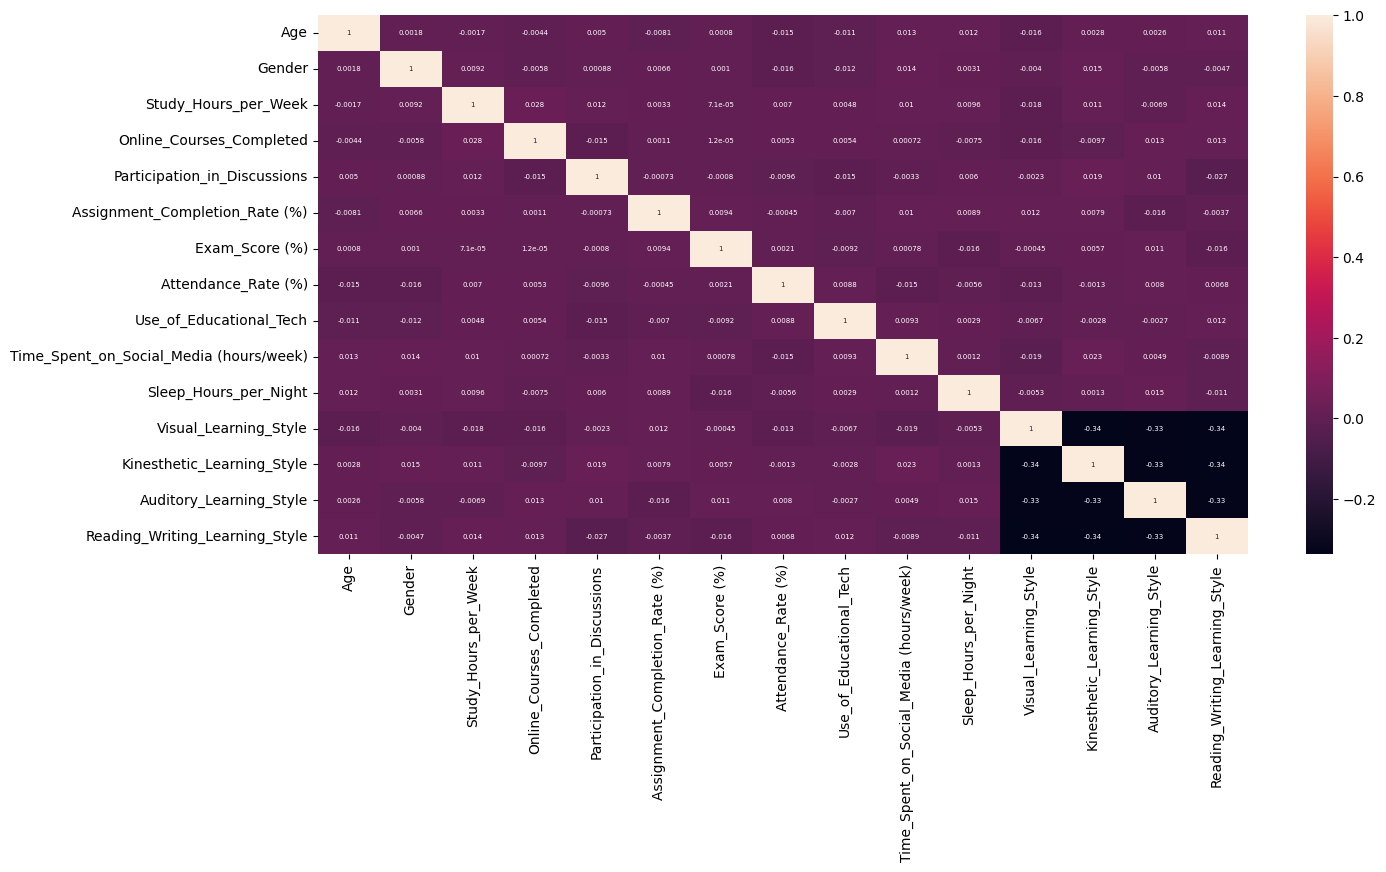

In [87]:
# When looking at a coloured plot of the correlations, you can clearly see that, except for the different learning styles, the variables are not strongly related.
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, annot_kws={"size": 5})
plt.show()

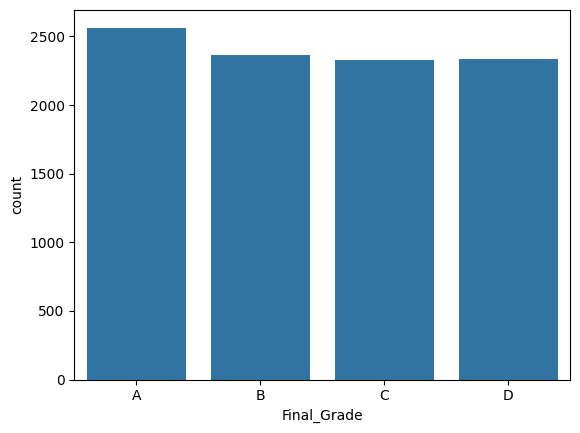

In [10]:
# exploring how the final grades were distributed
order = sorted(df["Final_Grade"].unique())
sns.countplot(data=df, x="Final_Grade", order=order)
plt.show()

In [28]:
from tensorflow.keras.datasets import cifar10
import numpy as np
from tqdm import tqdm

# Selecting the variables we want to use in predicting the outcome variable.
X = df[["Age", "Gender", "Study_Hours_per_Week", "Online_Courses_Completed", "Visual_Learning_Style", "Kinesthetic_Learning_Style", "Auditory_Learning_Style", "Reading_Writing_Learning_Style", "Participation_in_Discussions", "Assignment_Completion_Rate (%)", "Attendance_Rate (%)", "Use_of_Educational_Tech", "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"]]

# The variable we want to predict in the end is the final grade.
Y = df["Final_Grade"]

# splitting the data set in a training set and test set
def get_data_subset(n_train, n_test):
    (train_X, train_y), (test_X, test_y) = (X[:n_train], Y[:n_train]), (X[n_train:], Y[n_train:])
    return train_X, train_y, test_X, test_y

n_train, n_test = 4797, 4797

train_X, train_y, test_X, test_y = get_data_subset(n_train, n_test)

In [29]:
# verifying whether the shape of the data is suitable for the machine learning models we want to use
train_X.shape

(4797, 14)

In [55]:
# random forest model:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as RFC

# creating arrays to store the mean and standard deviation of the train and test accuracy for each combination of number of trees and tree depth
train_acc_mean, train_acc_std = np.zeros((10, 8)), np.zeros((10, 8))
test_acc_mean, test_acc_std = np.zeros((10, 8)), np.zeros((10,8))

# the different tree depths & amount of trees we will use in the decision trees model
n_trees = [1,5,10,20,40,60,80,100,200,500]
depths = [1,3,5,7,9,11,13,15]

# going over each possible combination of number of trees and tree depth
for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        # since each model is going to be estimated multiple times, we need lists to store the accuracies on the train and test set in
        train_perfs = []
        test_perfs = []
        # estimating the model 5 times to capture potential variation in the result
        for n in range(1, 6):
            # initializing a new model using a random state of 42 to ensure reproducability
            modelRF = RFC(n_estimators=n_trees, max_depth=d, random_state=42)
            # training the model
            modelRF = modelRF.fit(train_X, train_y)
            # storing the accuracy of the model on the train and test data set
            train_perfs.append(modelRF.score(train_X, train_y))
            test_perfs.append(modelRF.score(test_X, test_y))
        # storing the mean and standard deviation of the accuracies of the estimated models on the train & test set for a given number of trees & tree depth
        train_acc_mean[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_std[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_mean[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_std[tree_idx][d_idx] = np.std(test_perfs)

100%|██████████| 10/10 [03:51<00:00, 23.19s/it]


In [48]:
print(train_acc_mean.shape)

(10, 8)


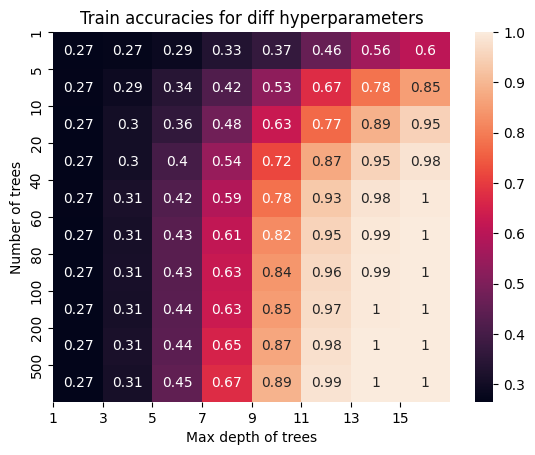

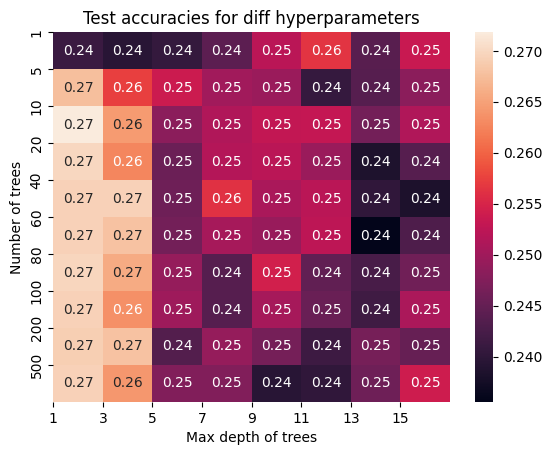

In [56]:
# creating a seaborn heatmap to show the train accuracies in
plt.figure()
sns.heatmap(train_acc_mean, annot=True)
# arranging the axes of the plot
plt.ylabel("Number of trees")
plt.xlabel("Max depth of trees")
plt.yticks(np.arange(0,10), [1,5,10,20,40,60,80,100,200,500])
plt.xticks(np.arange(0,8), depths)
# adding a title
plt.title("Train accuracies for diff hyperparameters")
plt.show()

# creating a seaborn heatmap to show the test accuracies in
plt.figure()
sns.heatmap(test_acc_mean, annot=True)
# arranging the axes of the plot
plt.ylabel("Number of trees")
plt.xlabel("Max depth of trees")
plt.yticks(np.arange(0,10), [1,5,10,20,40,60,80,100,200,500])
plt.xticks(np.arange(0,8), depths)
# adding a title
plt.title("Test accuracies for diff hyperparameters")
plt.show()

In [57]:
# decision trees model:
from sklearn import tree

# creating lists to store the mean and standard deviation of the train and test accuracies per three depth in
train_acc_mean, train_acc_std = [], []
test_acc_mean, test_acc_std = [], []

# looping over different tree depths to estimate the model with
for d in tqdm(range(1, 16)):
    # since each model is going to be estimated multiple times, we need lists to store the accuracies on the train and test set in
    train_perfs = []
    test_perfs = []
    # estimating the model 10 times to capture potential variation in the result
    for n in range(1, 11):
        # inititalizing a new model
        modelDT = tree.DecisionTreeClassifier(max_depth=d)
        # training the model
        modelDT = modelDT.fit(train_X, train_y)
        # storing the accuracy of the model on the train and test data set
        train_perfs.append(modelDT.score(train_X, train_y))
        test_perfs.append(modelDT.score(test_X, test_y))

    # storing the mean and standard deviation of the accuracies of the estimated models on the train & test set for a given tree depth
    train_acc_mean.append(np.mean(train_perfs))
    train_acc_std.append(np.std(train_perfs))
    test_acc_mean.append(np.mean(test_perfs))
    test_acc_std.append(np.std(test_perfs))

100%|██████████| 15/15 [00:05<00:00,  2.52it/s]


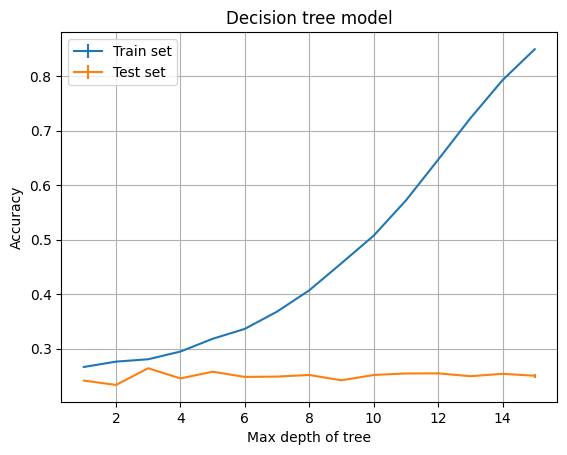

[np.float64(0.24119241192411925), np.float64(0.23327079424640398), np.float64(0.2639149468417762), np.float64(0.24515322076297688), np.float64(0.2575776526996039), np.float64(0.24790494058786744), np.float64(0.24857202418178023), np.float64(0.2515113612674588), np.float64(0.24173441734417342), np.float64(0.25149051490514907), np.float64(0.25426308109234935), np.float64(0.25449239107775695), np.float64(0.2492808005003127), np.float64(0.25359599749843653), np.float64(0.25013550135501356)]
[np.float64(0.0), np.float64(2.7755575615628914e-17), np.float64(5.551115123125783e-17), np.float64(2.7755575615628914e-17), np.float64(0.0002827738162653839), np.float64(0.00022452219333477506), np.float64(0.0003634687465950157), np.float64(0.0005294319407629896), np.float64(0.0006267790860276371), np.float64(0.0010092739993254319), np.float64(0.0010299453264153093), np.float64(0.0015979793951833806), np.float64(0.0012396138209146107), np.float64(0.002270722968064701), np.float64(0.003383859715921135)]

In [58]:
# creating the graphs
plt.errorbar(x=np.arange(1,16), y=train_acc_mean, yerr=train_acc_std, label="Train set")
plt.errorbar(x=np.arange(1,16), y=test_acc_mean, yerr=test_acc_std, label="Test set")

# adding a title and axes
plt.title("Decision tree model")
plt.ylabel("Accuracy")
plt.xlabel("Max depth of tree")
plt.legend()
plt.grid()
plt.show()

# printing the numerical accuracies on the test set to determine slightly better which model predicts best
print(test_acc_mean)
print(test_acc_std)

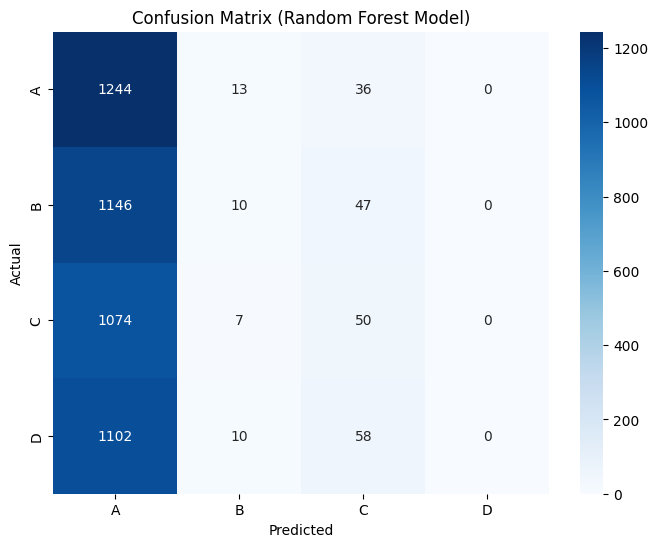

In [69]:
from sklearn.metrics import confusion_matrix

# estimating the random forest model with the preferred parameters found before
RFestimation = RFC(n_estimators=10, max_depth=1, random_state=42)
RFestimation.fit(train_X, train_y)

# predicting final grade with the estimated model
y_predRF = RFestimation.predict(test_X)

# creating the confusion matrix with the appropriate grade order
class_labels = ["A", "B", "C", "D"]
cmRF = confusion_matrix(test_y, y_predRF, labels=class_labels)

# plotting the confuction matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmRF, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# adding axes and a title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Random Forest Model)')

plt.show()



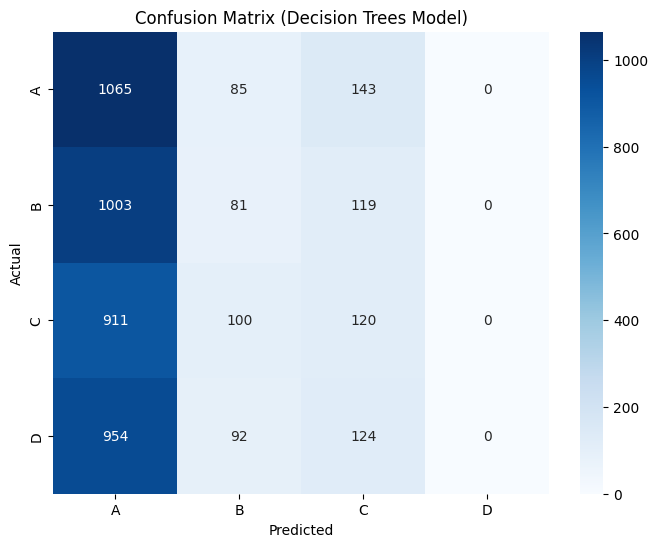

In [71]:
# estimating the decision tree model with the preferred parameters found before
DTestimation = tree.DecisionTreeClassifier(max_depth=3)
DTestimation.fit(train_X, train_y)

# predicting final grade with the estimated model
y_predDT = DTestimation.predict(test_X)

# creating the confusion matrix with the appropriate grade order
cmDT = confusion_matrix(test_y, y_predDT, labels=class_labels)

# plotting the confuction matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmDT, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# adding axes and a title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Decision Trees Model)')

plt.show()